**Finished Code For Slang Clustering in Illiad DataSet**



#PreProcessing

In [ ]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from scipy.spatial.distance import mahalanobis

In [ ]:
#!pip install spacy

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/Users/brian/git/big_data_fall2022/asdrp-big-data/sentiment-analysis/iliad_csvs'

data = []

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)

        csv_data = []

        with open(file_path, 'r', encoding='utf-8') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                for cell in row:
                    words = cell.split()
                    csv_data.extend(words)

        data.append(csv_data)

In [ ]:
l = data

In [ ]:
linguistic_data = l[:3000]
linguistic_data

[['τῶν',
  'μὲν',
  "ἄρ'",
  'Ἰδομενεὺς',
  'δουρὶ',
  'κλυτὸς',
  'ἡγεμόνευε',
  'Μηριόνης',
  "τ'",
  'ἀτάλαντος',
  'Ἐνυαλίῳ',
  'ἀνδρειφόντῃ:',
  'τοῖσι',
  "δ'",
  "ἅμ'",
  'ὀγδώκοντα',
  'μέλαιναι',
  'νῆες',
  'ἕποντο'],
 ["ἀλλ'",
  "ἄγ'",
  'ἐγών,',
  'ὃς',
  'σεῖο',
  'γεραίτερος',
  'εὔχομαι',
  'εἶναι,',
  'ἐξείπω',
  'καὶ',
  'πάντα',
  'διίξομαι:',
  'οὐδέ',
  'κέ',
  'τίς',
  'μοι',
  'μῦθον',
  "ἀτιμήσει',",
  'οὐδὲ',
  'κρείων',
  'Ἀγαμέμνων'],
 ['ἱπποκόμου',
  'κόρυθος',
  'φάλον',
  'ἤλασεν,',
  'ἀμφὶ',
  'δὲ',
  'καυλὸν',
  'φάσγανον',
  'ἐρραίσθη:',
  'ὃ',
  "δ'",
  "ὑπ'",
  'οὔατος',
  'αὐχένα',
  'θεῖνε',
  'Πηνέλεως,',
  'πᾶν',
  "δ'",
  'εἴσω',
  'ἔδυ',
  'ξίφος,',
  'ἔσχεθε',
  "δ'",
  'οἶον',
  'δέρμα,',
  'παρηέρθη',
  'δὲ',
  'κάρη,',
  'ὑπέλυντο',
  'δὲ',
  'γυῖα'],
 ['εὗρε',
  'δὲ',
  'Πατρόκλῳ',
  'περικείμενον',
  'ὃν',
  'φίλον',
  'υἱὸν',
  'κλαίοντα',
  'λιγέως:',
  'πολέες',
  "δ'",
  "ἀμφ'",
  'αὐτὸν',
  'ἑταῖροι',
  "μύρονθ':",
  'ἣ',
  "δ'",
  'ἐν

#Formality Detector

In [ ]:
#!pip install spacy
#!python -m spacy download el_core_news_sm

2023-08-30 00:31:07.583725: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 64.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [ ]:
#!pip install -U grecy

In [ ]:
#!python -m grecy install grc_perseus_sm


Installing grc_perseus_sm.....

Please wait, this could take some minutes.....

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 7.1 MB/s eta 0:00:00



In [ ]:
import spacy
nlp = spacy.load("grc_perseus_sm")


def detect_formality(sentences):
    results = []

    for sentence in sentences:
        text = ' '.join(sentence)

        doc = nlp(text)

        formal_count = 0
        informal_count = 0

        #Change these to specifically reflect features of the greek language. Modify to use SPACY maybe.
        formal_features = {"VERB", "ADV", "ADJ", "NOUN","AUX", "ADP", "CCONJ"}
        informal_features = {"INTJ","X", "PRON", "PROPN"}

        for token in doc:
            if token.pos_ in formal_features:
                formal_count += 1
            elif token.pos_ in informal_features:
                informal_count += 1

        if 0.3 * (formal_count + informal_count) < informal_count:
            result = "Informal"
        else:
            result = "Formal"

        results.append(result)

    return results

sentences = linguistic_data
results = detect_formality(sentences)
print(results)
print(results.count('Formal'))

['Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal

In [ ]:
def filter_sentences_by_formality(sentences, formality_results, target_formality):
    filtered_sentences = []

    for i, result in enumerate(formality_results):
        if result == target_formality:
            filtered_sentences.append(sentences[i])

    return filtered_sentences

In [ ]:
linguistic_data1 = filter_sentences_by_formality(linguistic_data, results, 'Informal')
print(len(linguistic_data1))
linguistic_data1

113


[['Ἰδομενεὺς',
  "δ'",
  'ἄρα',
  'Φαῖστον',
  'ἐνήρατο',
  'Μῄονος',
  'υἱὸν',
  'Βώρου,',
  'ὃς',
  'ἐκ',
  'Τάρνης',
  'ἐριβώλακος',
  'εἰληλούθει'],
 ['Κρητῶν',
  "δ'",
  'Ἰδομενεὺς',
  'δουρὶ',
  'κλυτὸς',
  'ἡγεμόνευεν,',
  'οἳ',
  'Κνωσόν',
  "τ'",
  'εἶχον',
  'Γόρτυνά',
  'τε',
  'τειχιόεσσαν,',
  'Λύκτον',
  'Μίλητόν',
  'τε',
  'καὶ',
  'ἀργινόεντα',
  'Λύκαστον',
  'Φαιστόν',
  'τε',
  'Ῥύτιόν',
  'τε,',
  'πόλεις',
  'εὖ',
  'ναιετοώσας,',
  'ἄλλοι',
  "θ'",
  'οἳ',
  'Κρήτην',
  'ἑκατόμπολιν',
  'ἀμφενέμοντο'],
 ['ἔνθα',
  'τίνα',
  'πρῶτον',
  'τίνα',
  "δ'",
  'ὕστατον',
  'ἐξενάριξαν',
  'Ἕκτωρ',
  'τε',
  'Πριάμοιο',
  'πάϊς',
  'καὶ',
  'χάλκεος',
  'Ἄρης;',
  'ἀντίθεον',
  "Τεύθραντ',",
  'ἐπὶ',
  'δὲ',
  'πλήξιππον',
  'Ὀρέστην,',
  'Τρῆχόν',
  "τ'",
  'αἰχμητὴν',
  'Αἰτώλιον',
  'Οἰνόμαόν',
  'τε,',
  'Οἰνοπίδην',
  "θ'",
  'Ἕλενον',
  'καὶ',
  'Ὀρέσβιον',
  'αἰολομίτρην,',
  'ὅς',
  "ῥ'",
  'ἐν',
  'Ὕλῃ',
  'ναίεσκε',
  'μέγα',
  'πλούτοιο',
  'μεμηλώς,',
  'λίμν

#Clustering Model

Mean of z-score normalized data: [-5.787873e-09 -4.397244e-08]
Standard deviation of z-score normalized data: [1.000001  1.0000005]


<ipython-input-49-2b41a48c3053>:62: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')


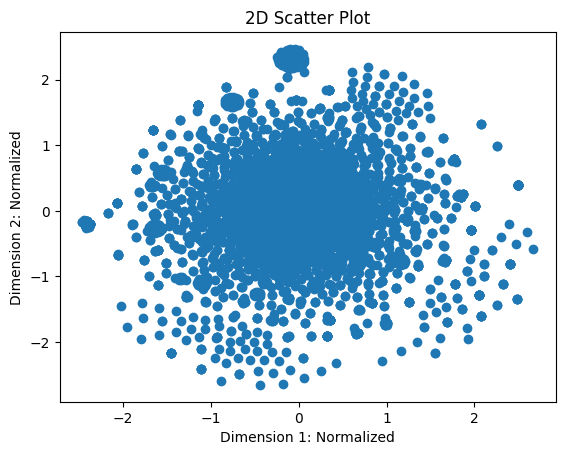

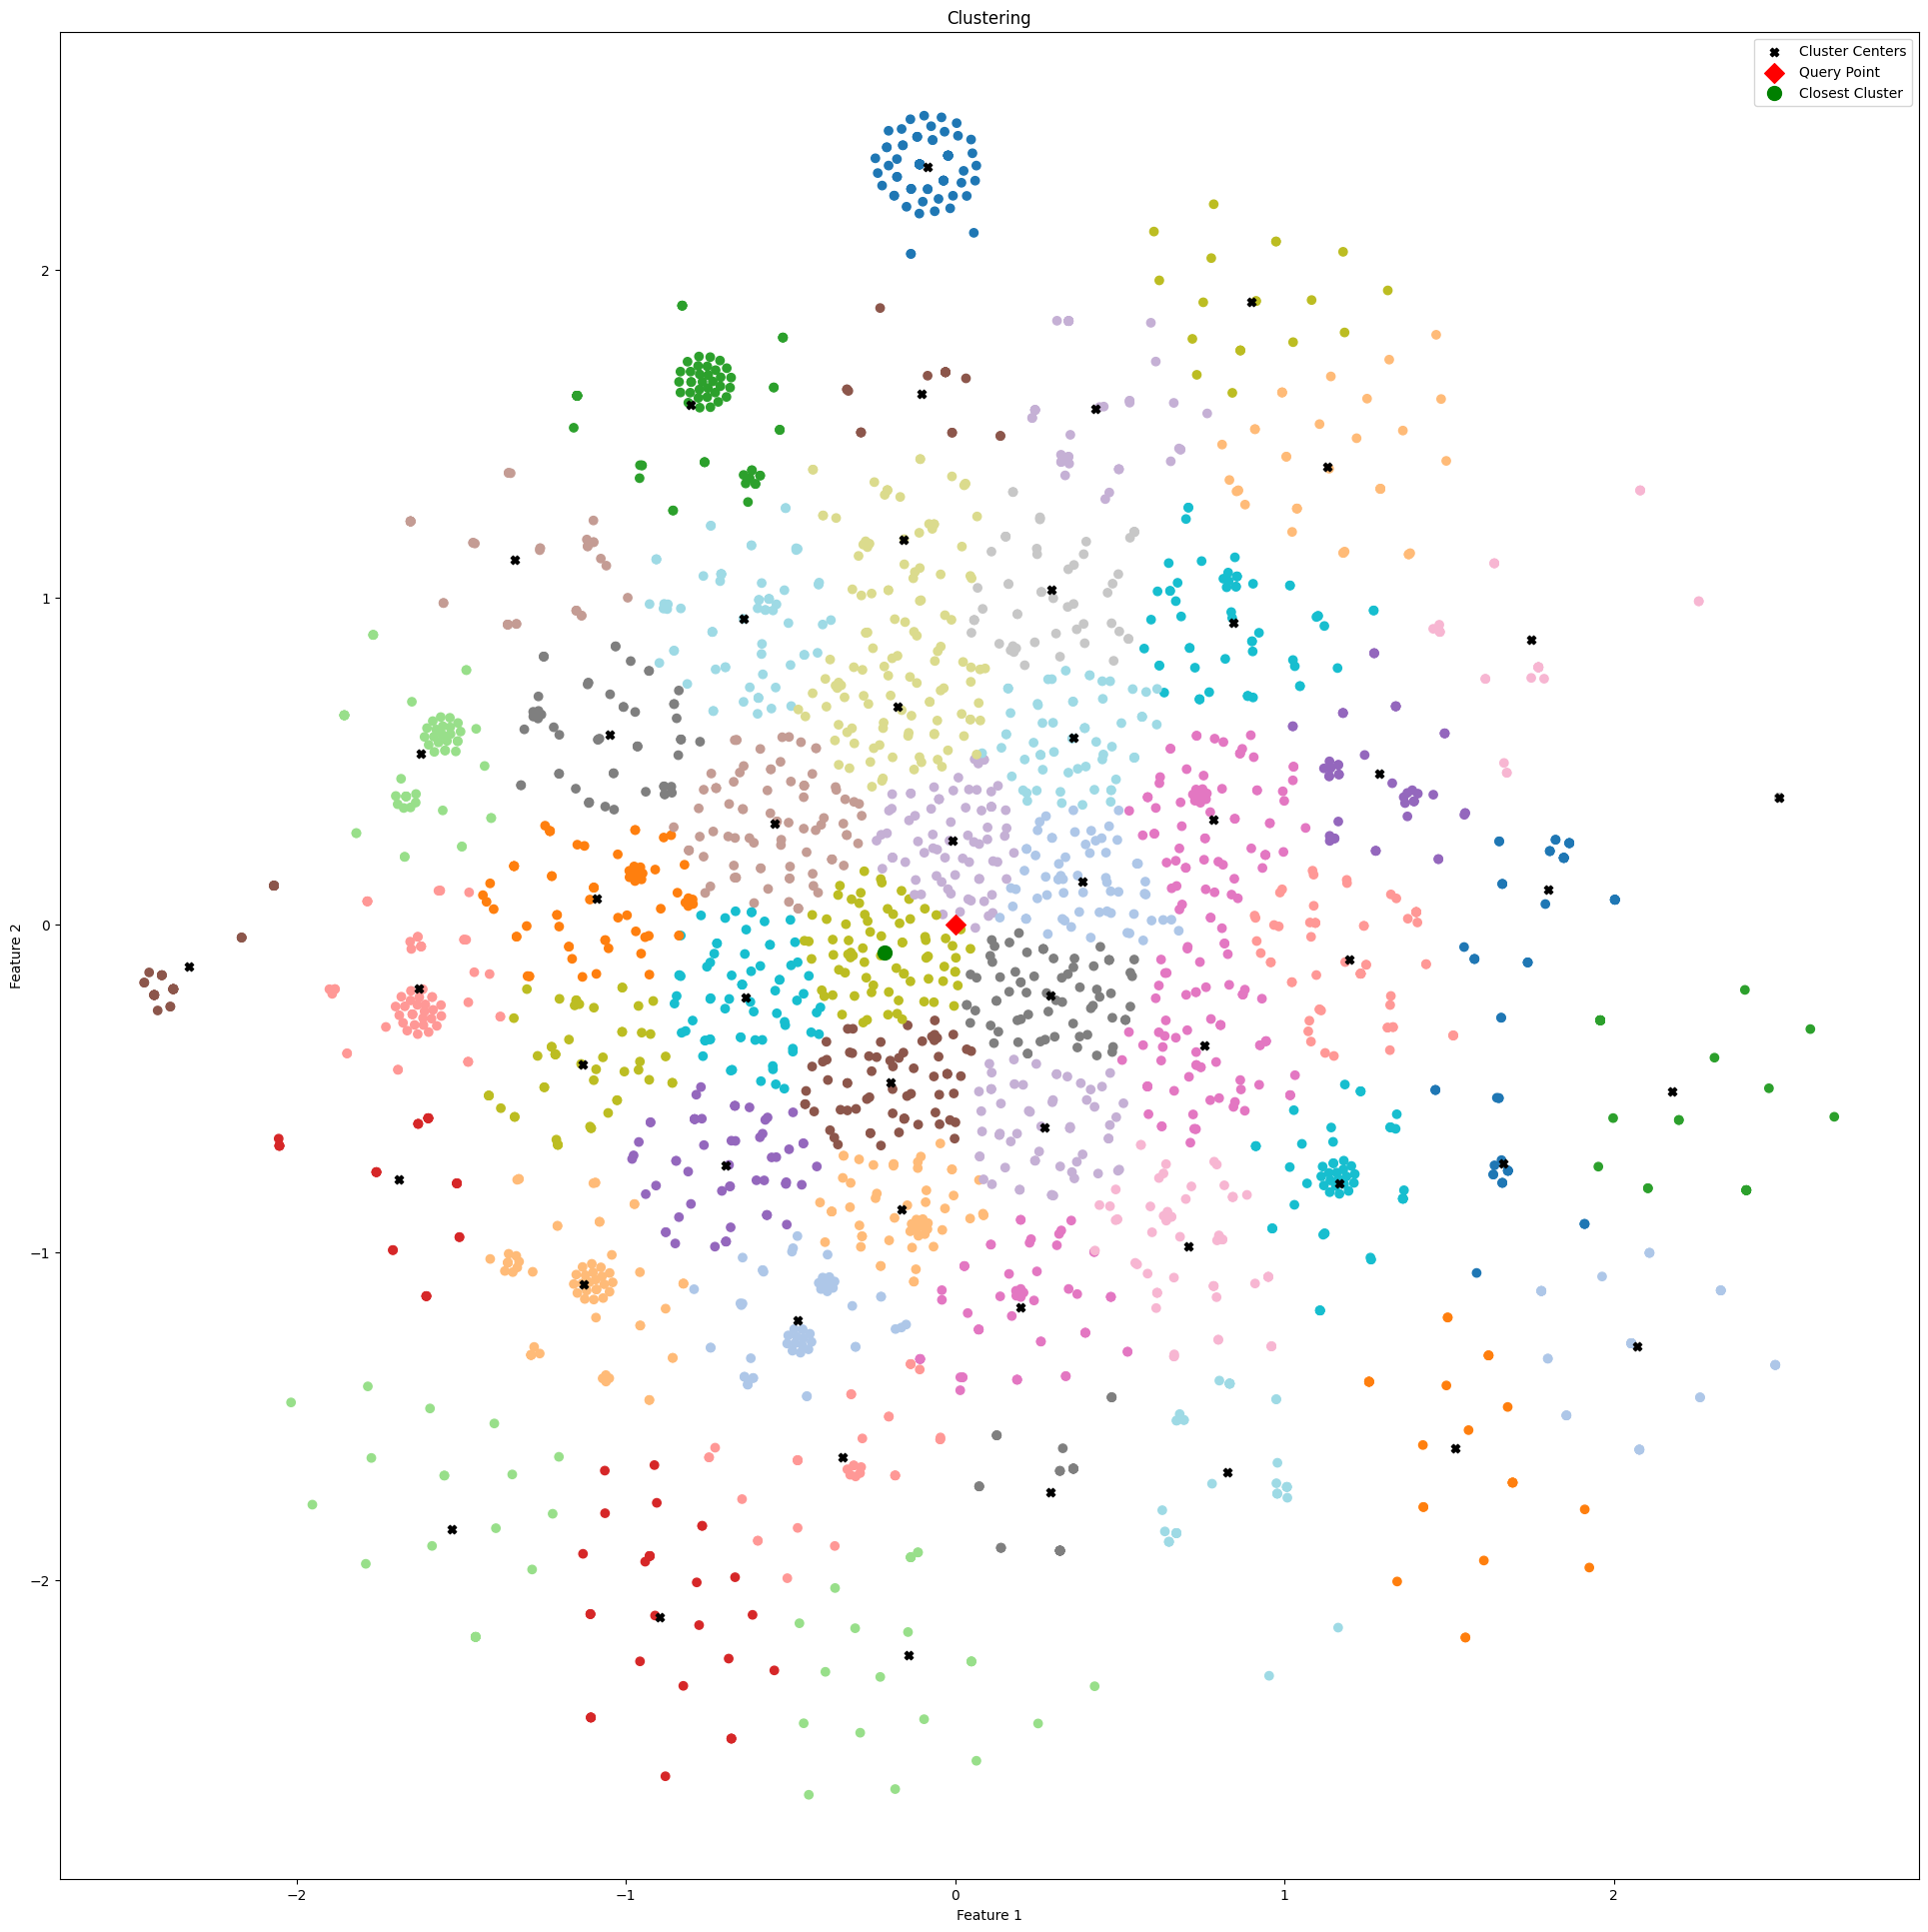

Cluster 1 - Mahalanobis Distance: 27.4197
Cluster 2 - Mahalanobis Distance: 14.5266
Cluster 3 - Mahalanobis Distance: 14.7146
Cluster 4 - Mahalanobis Distance: 11.5958
Cluster 5 - Mahalanobis Distance: 9.5748
Cluster 6 - Mahalanobis Distance: 3.3397
Cluster 7 - Mahalanobis Distance: 8.4370
Cluster 8 - Mahalanobis Distance: 6.0090
Cluster 9 - Mahalanobis Distance: 11.2816
Cluster 10 - Mahalanobis Distance: 8.3851
Cluster 11 - Mahalanobis Distance: 9.3521
Cluster 12 - Mahalanobis Distance: 11.0727
Cluster 13 - Mahalanobis Distance: 9.7604
Cluster 14 - Mahalanobis Distance: 12.0871
Cluster 15 - Mahalanobis Distance: 13.1100
Cluster 16 - Mahalanobis Distance: 9.3207
Cluster 17 - Mahalanobis Distance: 11.5095
Cluster 18 - Mahalanobis Distance: 10.2085
Cluster 19 - Mahalanobis Distance: 11.0419
Cluster 20 - Mahalanobis Distance: 7.2182
Cluster 21 - Mahalanobis Distance: 13.6678
Cluster 22 - Mahalanobis Distance: 7.1005
Cluster 23 - Mahalanobis Distance: 10.0539
Cluster 24 - Mahalanobis Dista

In [ ]:
def affinity_propagation(X, max_iter=200, damping=0.8, convergence_iter=15, random_state=None):
    affinity_prop = AffinityPropagation(max_iter=max_iter, damping=damping, convergence_iter=convergence_iter, random_state=random_state)
    cluster_centers_indices = affinity_prop.fit_predict(X)
    cluster_centers = np.array([X[cluster_centers_indices == i].mean(axis=0) for i in np.unique(cluster_centers_indices)])
    return cluster_centers_indices, cluster_centers

def mahalanobis_distance(query_point, clusters, covariances, regularization=1e-6):
    distances = []
    for center, covariance in zip(clusters, covariances):
        inv_covariance = np.linalg.pinv(covariance + regularization * np.eye(covariance.shape[0]))
        distance = mahalanobis(query_point, center, inv_covariance)
        distances.append(distance)
    return distances

def compute_covariance_matrix(cluster_data):
    if cluster_data.shape[0] > 1:
        return np.cov(cluster_data, rowvar=False)
    else:
        num_features = cluster_data.shape[1]
        return np.eye(num_features)

def plot_clusters(X, cluster_centers_indices, cluster_centers, query_point, min_cluster_index, figsize=(24, 24)):
    num_clusters = len(np.unique(cluster_centers_indices))
    cmap = plt.get_cmap('tab20', num_clusters)

    plt.figure(figsize=figsize)

    plt.scatter(X[:, 0], X[:, 1], c=cluster_centers_indices, cmap=cmap)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', color='black', label='Cluster Centers')
    plt.scatter(query_point[0], query_point[1], marker='D', color='red', s=100, label='Query Point')
    if min_cluster_index != -1:
        min_cluster_center = cluster_centers[min_cluster_index]
        plt.scatter(min_cluster_center[0], min_cluster_center[1], marker='o', color='green', s=100, label='Closest Cluster')
    plt.legend()
    plt.title("Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


def embed_linguistic_data(linguistic_data):
    model = Word2Vec(sentences=linguistic_data, vector_size=100, window=5, min_count=1, sg=0)
    embeddings = [model.wv[word] for sentence in linguistic_data for word in sentence]
    return np.array(embeddings)

if __name__ == "__main__":

    embeddings = embed_linguistic_data(linguistic_data1)

    n_dimensions = 2
    perplexity = 30
    tsne_model = TSNE(n_components=n_dimensions, perplexity=perplexity)
    n_dimensional_points = tsne_model.fit_transform(embeddings)

    mean_values = np.mean(n_dimensional_points, axis=0)
    std_values = np.std(n_dimensional_points, axis=0)
    z_score_normalized_data = (n_dimensional_points - mean_values) / std_values

    print("Mean of z-score normalized data:", np.mean(z_score_normalized_data, axis=0))
    print("Standard deviation of z-score normalized data:", np.std(z_score_normalized_data, axis=0))

    plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')
    plt.xlabel('Dimension 1: Normalized')
    plt.ylabel('Dimension 2: Normalized')
    plt.title('2D Scatter Plot')
    plt.show()

    np.random.seed(42)
    X = z_score_normalized_data

    cluster_centers_indices, cluster_centers = affinity_propagation(X)

    if not cluster_centers.any():
        print("Clustering failed to converge.")
    else:
        clusters_data = [X[cluster_centers_indices == i] for i in range(len(cluster_centers))]
        covariances = [compute_covariance_matrix(cluster_data) for cluster_data in clusters_data]

        query_point = np.array([0.0, 0.0])

        distances = mahalanobis_distance(query_point, cluster_centers, covariances)

        min_distance = float('inf')
        min_cluster_index = -1
        for i, distance in enumerate(distances):
            if distance < min_distance:
                min_distance = distance
                min_cluster_index = i

        plot_clusters(X, cluster_centers_indices, cluster_centers, query_point, min_cluster_index)

        for i, distance in enumerate(distances):
            print(f"Cluster {i+1} - Mahalanobis Distance: {distance:.4f}")

        if min_cluster_index != -1:
            print(f"\nCluster with the smallest Mahalanobis distance: Cluster {min_cluster_index + 1}")